<a href="https://colab.research.google.com/github/15483114/colab-notebooks/blob/main/2015_Flight_Delays_and_Cancellations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2015 Flight Delays and Cancellations**

Neste notebook será analisado o dataset de atrasos e cancelamentos de voos em 2015.

O objetivo é descobrir se é possível obter um bom modelo de classificação para prever se um voo irá atrasar ou não dadas as variáveis coletadas para a criação do dataset.

# Importando Dataset

In [1]:
import pandas as pd

airlines = pd.read_csv('/content/airlines.csv')
airports = pd.read_csv('/content/airports.csv')
flights = pd.read_csv('/content/flights.csv', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Explorando os datasets

In [2]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

Visualizando a equivalência do código para cada companhia aérea

In [3]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


Visualizando a equivalência do código para cada aeroporto

In [4]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


# **Analisando a relação entre atrasos e companias aereas**

Visualizando os atrasos por companhia aérea

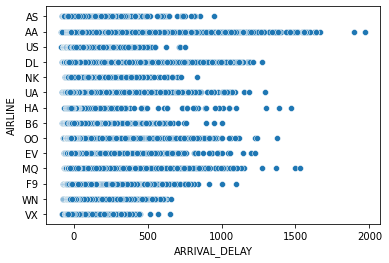

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = flights, x = "ARRIVAL_DELAY", y = "AIRLINE")

plt.show()

Verificando a proporção de atrasos por companhia aérea



Criando a coluna Atrasado com variáveis binárias (0 ou 1)

In [6]:
array=[]
for x in flights['ARRIVAL_DELAY']:
  variable = 1 if x>0 else 0
  array.append(variable)

flights['Atrasado'] = array

Criando a tabela com proporção de atraso por linha aérea

In [7]:
import numpy as np

delay_occurencies = np.array([])
delay_occurencies_percentage = np.array([])

for airline in airlines['IATA_CODE'].values:
  atrasou = flights[flights["AIRLINE"] == airline][["Atrasado"]].value_counts(sort = 0)[1]
  delay_occurencies = np.append(delay_occurencies,atrasou)

  total = len(flights[flights["AIRLINE"] == airline][["Atrasado"]])
  atrasado = flights[flights["AIRLINE"] == airline][["Atrasado"]].value_counts()[1]
  porcentagem = (atrasado/total)*100
  delay_occurencies_percentage = np.append(delay_occurencies_percentage,porcentagem)

In [8]:
import numpy as np

atraso_por_linha_aerea = []

for airline in flights['AIRLINE'].unique():
  nova_linha = {}
  nova_linha["Airline"] = airline
  total = len(flights[flights["AIRLINE"] == airline][["Atrasado"]])
  atrasado = flights[flights["AIRLINE"] == airline][["Atrasado"]].value_counts()[1]
  porcentagem = (atrasado/total)*100
  nova_linha["Porcentagem"] = porcentagem
  atraso_por_linha_aerea.append(nova_linha)

atraso_por_linha_aerea

[{'Airline': 'AS', 'Porcentagem': 33.0122130059529},
 {'Airline': 'AA', 'Porcentagem': 34.73781791334245},
 {'Airline': 'US', 'Porcentagem': 38.389150290617216},
 {'Airline': 'DL', 'Porcentagem': 28.638593598902133},
 {'Airline': 'NK', 'Porcentagem': 48.46437608090033},
 {'Airline': 'UA', 'Porcentagem': 36.10988844786833},
 {'Airline': 'HA', 'Porcentagem': 39.56760016782043},
 {'Airline': 'B6', 'Porcentagem': 38.194631676702315},
 {'Airline': 'OO', 'Porcentagem': 37.806384942373036},
 {'Airline': 'EV', 'Porcentagem': 37.27719820901889},
 {'Airline': 'MQ', 'Porcentagem': 35.130264193977574},
 {'Airline': 'F9', 'Porcentagem': 45.39169492271787},
 {'Airline': 'WN', 'Porcentagem': 37.307535334883966},
 {'Airline': 'VX', 'Porcentagem': 39.06111173933412}]

In [9]:
# Creates DataFrame.  
df = pd.DataFrame(atraso_por_linha_aerea)  
df

,Airline,Porcentagem
0,AS,33.012213
1,AA,34.737818
2,US,38.389150
3,DL,28.638594
4,NK,48.464376
5,UA,36.109888
6,HA,39.567600
7,B6,38.194632
8,OO,37.806385
9,EV,37.277198


In [10]:
flights[flights["AIRLINE"] == airline][["Atrasado"]].value_counts(sort = 0)

Atrasado
0           37723
1           24180
dtype: int64

In [11]:
delay_occurencies

array([186227., 252191.,  76285.,  41232., 101998., 222435.,  56953.,
        56887., 470767., 250840., 213217.,  30179., 103505.,  24180.])

Proporção global de atrasos

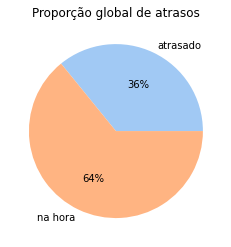

In [12]:
data = [delay_occurencies.sum(), len(flights["Atrasado"]) - delay_occurencies.sum()]
labels = ['atrasado','na hora']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Proporção global de atrasos")
plt.show()

Atrasos por companhia

Gráfico de média e proporcao

Como utilizamos uma variavel binária de 0 e 1, a média é a proporção de atrasos

In [ ]:
df

,Airline,Porcentagem
0,AS,33.017735
1,AA,34.663138
2,US,38.389150
3,DL,28.531867
4,NK,48.414086
5,UA,36.088272
6,HA,39.585832
7,B6,38.122200
8,OO,37.746099
9,EV,37.214518


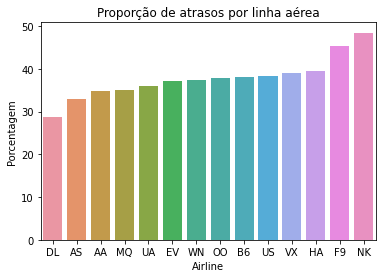

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = 'Airline', y = 'Porcentagem', data = df, order=df.sort_values('Porcentagem').Airline)
plt.title("Proporção de atrasos por linha aérea")
plt.show()

In [14]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


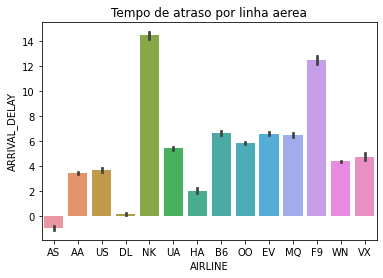

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = 'AIRLINE', y = 'ARRIVAL_DELAY', data = flights)
plt.title("Tempo de atraso por linha aerea")
plt.show()

In [16]:
import numpy as np
time_delayed = np.array([])
mediana = np.array([])
for airline in airlines['IATA_CODE'].values:
  tempo_medio = flights[flights["AIRLINE"] == airline][["ARRIVAL_DELAY"]].query("ARRIVAL_DELAY >0").mean()
  time_delayed = np.append(time_delayed,tempo_medio)
  median = flights[flights["AIRLINE"] == airline][["ARRIVAL_DELAY"]].query("ARRIVAL_DELAY >0").median()
  mediana = np.append(mediana,median)

In [17]:
print("Tempo médio de atrasos", time_delayed)

Tempo médio de atrasos [39.20931444 34.14836374 27.41992528 41.19043461 38.13280653 32.43727831
 22.56241111 40.65985199 29.41849577 32.07742386 35.19804237 15.37976739
 39.50920245 30.72522746]


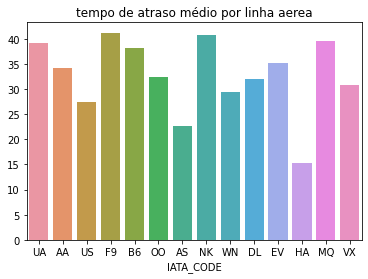

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.barplot(x = airlines['IATA_CODE'], y = time_delayed)
plt.title("tempo de atraso médio por linha aerea")
plt.show()

Pelos gráficos notamos que as companhias com mais chances de atrasar em comparação com as demais são a Spirit Air Lines e Frontier Airlines Inc. .

# **Atrasos por aeroporto**

Verificando a proporção de atrasos por aeroporto

In [24]:
airports['IATA_CODE']

0      ABE
1      ABI
2      ABQ
3      ABR
4      ABY
      ... 
317    WRG
318    WYS
319    XNA
320    YAK
321    YUM
Name: IATA_CODE, Length: 322, dtype: object

In [25]:
import numpy as np

delay_occurencies_airport = np.array([])
delay_occurencies_percentage = np.array([])

for airport in airports['IATA_CODE'].values:
  if(len(flights[flights["ORIGIN_AIRPORT"] == 'AKN'][["Atrasado"]].value_counts()) > 0):
    atrasou = flights[flights["ORIGIN_AIRPORT"] == airport][["Atrasado"]].value_counts()[1]
    
    delay_occurencies_airport = np.append(delay_occurencies,atrasou)

    total = len(flights[flights["ORIGIN_AIRPORT"] == airport][["Atrasado"]])
    atrasado = flights[flights["ORIGIN_AIRPORT"] == airport][["Atrasado"]].value_counts()[1]
    porcentagem = (atrasado/total)*100
    delay_occurencies_percentage = np.append(delay_occurencies_percentage,porcentagem)

In [26]:
import numpy as np


atraso_por_aeroporto = []

for airport in airports['IATA_CODE'].unique():
  novo_aeroporto = {}
  novo_aeroporto["Aeroporto"] = airport
  total = len(flights[flights["ORIGIN_AIRPORT"] == airport][["Atrasado"]])
  atrasado = flights[flights["ORIGIN_AIRPORT"] == airport][["Atrasado"]].value_counts()[1]
  porcentagem = (atrasado/total)*100
  novo_aeroporto["Porcentagem"] = porcentagem
  atraso_por_aeroporto.append(novo_aeroporto)

atraso_por_aeroporto

[{'Aeroporto': 'ABE', 'Porcentagem': 36.32365875109939},
 {'Aeroporto': 'ABI', 'Porcentagem': 29.454701588664662},
 {'Aeroporto': 'ABQ', 'Porcentagem': 36.29116298457691},
 {'Aeroporto': 'ABR', 'Porcentagem': 36.661698956780924},
 {'Aeroporto': 'ABY', 'Porcentagem': 35.273972602739725},
 {'Aeroporto': 'ACK', 'Porcentagem': 32.926829268292686},
 {'Aeroporto': 'ACT', 'Porcentagem': 28.90818858560794},
 {'Aeroporto': 'ACV', 'Porcentagem': 34.015151515151516},
 {'Aeroporto': 'ACY', 'Porcentagem': 40.117581187010074},
 {'Aeroporto': 'ADK', 'Porcentagem': 58.333333333333336},
 {'Aeroporto': 'ADQ', 'Porcentagem': 34.78260869565217},
 {'Aeroporto': 'AEX', 'Porcentagem': 37.44437380801017},
 {'Aeroporto': 'AGS', 'Porcentagem': 42.52435408725116},
 {'Aeroporto': 'AKN', 'Porcentagem': 50.79365079365079},
 {'Aeroporto': 'ALB', 'Porcentagem': 26.893685480627425},
 {'Aeroporto': 'ALO', 'Porcentagem': 27.876823338735818},
 {'Aeroporto': 'AMA', 'Porcentagem': 35.927859515899385},
 {'Aeroporto': 'ANC',

Atrasos por aeroporto

In [28]:
# Creates DataFrame.  

df = pd.DataFrame(atraso_por_aeroporto)  
df

,Aeroporto,Porcentagem
0,ABE,36.323659
1,ABI,29.454702
2,ABQ,36.291163
3,ABR,36.661699
4,ABY,35.273973
...,...,...
317,WRG,35.542169
318,WYS,27.884615
319,XNA,40.148659
320,YAK,24.018127


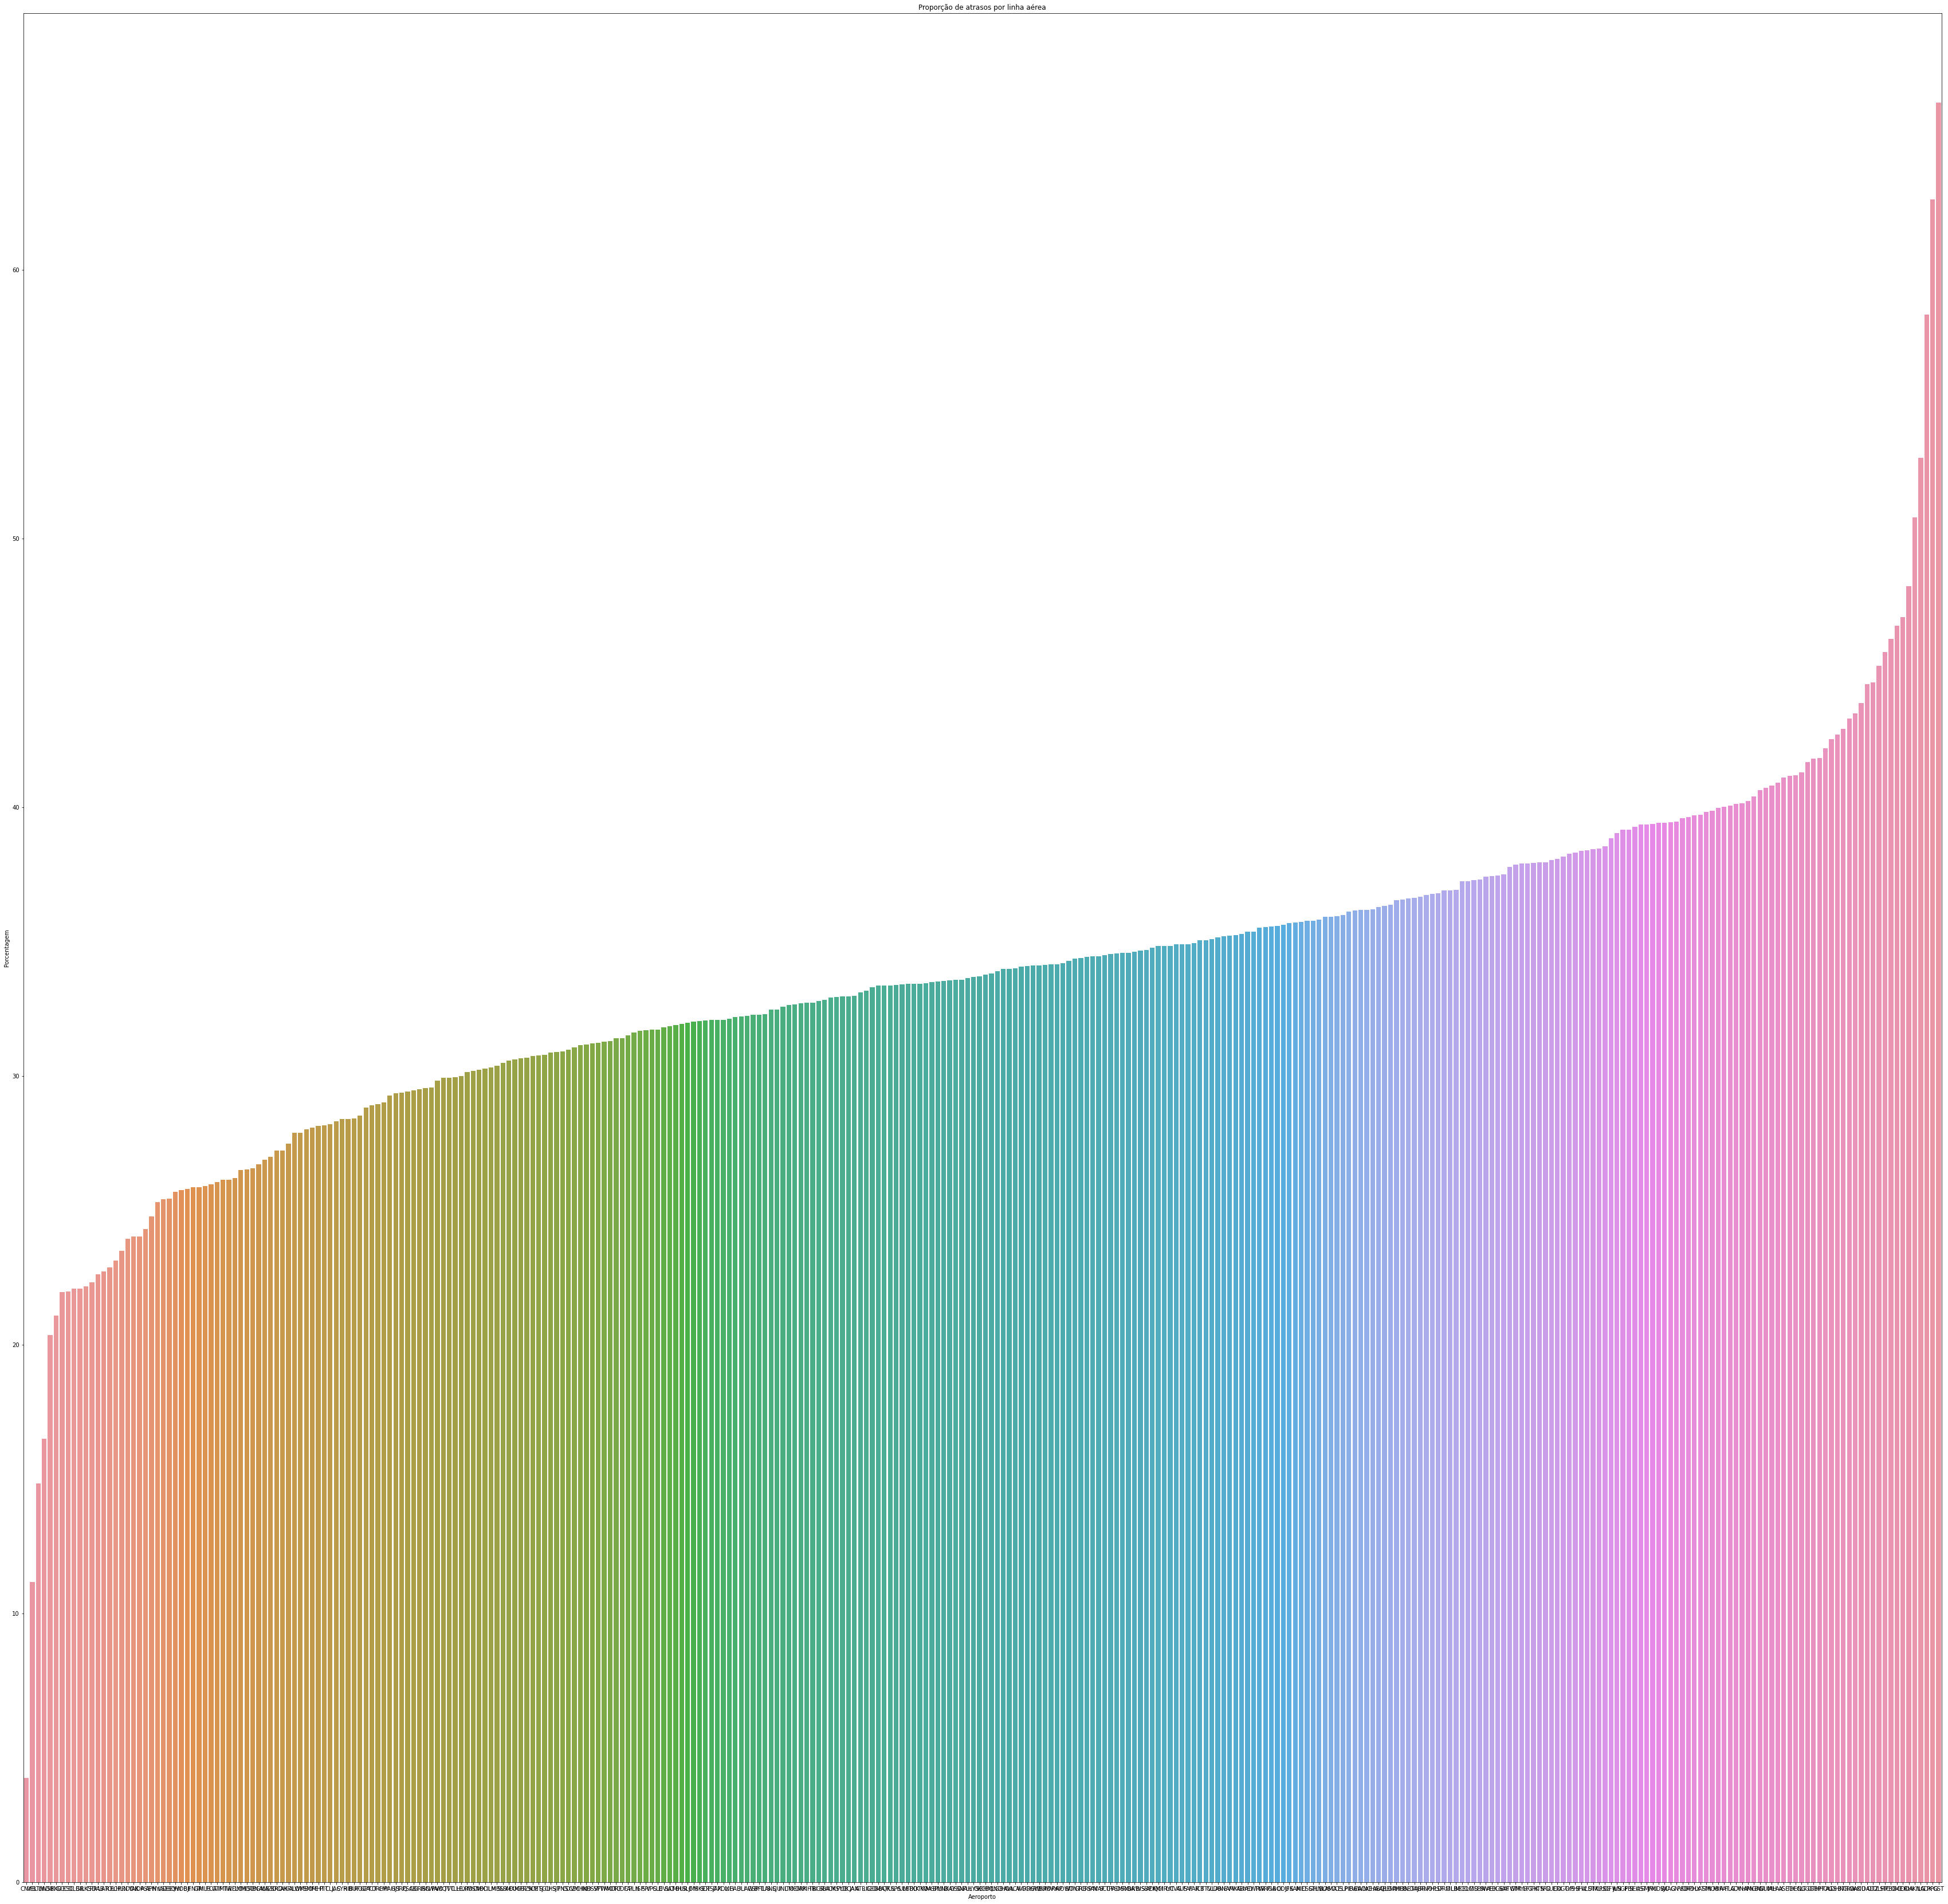

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.barplot(x = 'Aeroporto', y = 'Porcentagem', data = df, order=df.sort_values('Porcentagem').Aeroporto)
plt.title("Proporção de atrasos por linha aérea")
fig.figure.set_size_inches(60, 60)
plt.show()

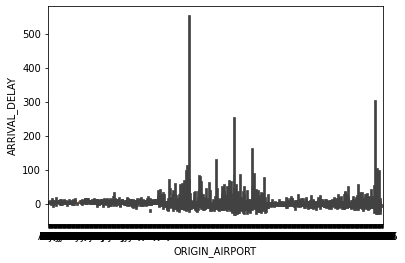

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = 'ORIGIN_AIRPORT', y = 'ARRIVAL_DELAY', data = flights)
 
plt.show()

Pelos gráficos notamos que os aeroportos GST, PPG, ADK	e ILG apresentam mais atrasos proporcionalmente.

# Lidando com a falta de dados

In [51]:
# Porcentagem de dados faltantes
flights.isnull().mean().round(4)*100

MONTH                  0.0
DAY                    0.0
DAY_OF_WEEK            0.0
AIRLINE                0.0
FLIGHT_NUMBER          0.0
TAIL_NUMBER            0.0
ORIGIN_AIRPORT         0.0
DESTINATION_AIRPORT    0.0
SCHEDULED_DEPARTURE    0.0
DEPARTURE_TIME         0.0
DEPARTURE_DELAY        0.0
TAXI_OUT               0.0
WHEELS_OFF             0.0
SCHEDULED_TIME         0.0
ELAPSED_TIME           0.0
AIR_TIME               0.0
DISTANCE               0.0
WHEELS_ON              0.0
TAXI_IN                0.0
SCHEDULED_ARRIVAL      0.0
ARRIVAL_TIME           0.0
ARRIVAL_DELAY          0.0
DIVERTED               0.0
CANCELLED              0.0
Atrasado               0.0
dtype: float64

In [ ]:
#tirando colunas com mais de 80% das dados faltando
flights = flights.drop(['YEAR'], axis=1) # tirando year também porque é uma constante basicamente
flights = flights.drop(['CANCELLATION_REASON'], axis=1)
flights = flights.drop(['AIR_SYSTEM_DELAY'], axis=1)
flights = flights.drop(['SECURITY_DELAY'], axis=1)
flights = flights.drop(['AIRLINE_DELAY'], axis=1)
flights = flights.drop(['LATE_AIRCRAFT_DELAY'], axis=1)
flights = flights.drop(['WEATHER_DELAY'], axis=1)

In [48]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'Atrasado'],
      dtype='object')

In [ ]:
# Procurando outliers nas colunas com alguma porcentagem de valores faltantes

import plotly.express as px
# df = px.flights.tips()
missing_values = ["DEPARTURE_TIME", "DEPARTURE_DELAY","TAXI_OUT", "WHEELS_OFF", "ELAPSED_TIME", "AIR_TIME", "WHEELS_ON", "TAXI_IN", "ARRIVAL_TIME", "ARRIVAL_DELAY" ]

for yvar in missing_values:
  fig = px.box(flights, y= yvar)
  fig.show()


A estratégia escolhida para lidar com a falta de dados é a substituição dos valores nulos pela média ou mediana dependendo a quantidade de outliers encontrados nos dados.

As features sem outliers receberão a média, estas são: departure_time, wheels_of, wheels_on, arrival_time

As features com outliers receberão a mediana, estas são: departure_delay, taxi_out, elapsed_time, air_time, taxi_in, arrival_delay

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(flights['DEPARTURE_TIME', 'WHEELS_OF', 'WHEELS_ON', 'ARRIVAL_TIME'])

flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].fillna(flights['DEPARTURE_TIME'].mean())
flights['WHEELS_OFF'] = flights['WHEELS_OFF'].fillna(flights['WHEELS_OFF'].mean())
flights['WHEELS_ON'] = flights['WHEELS_ON'].fillna(flights['WHEELS_ON'].mean())
flights['ARRIVAL_TIME'] = flights['ARRIVAL_TIME'].fillna(flights['ARRIVAL_TIME'].mean())

flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].fillna(flights['DEPARTURE_TIME'].median())
flights['TAXI_OUT'] = flights['TAXI_OUT'].fillna(flights['TAXI_OUT'].median())
flights['ELAPSED_TIME'] = flights['ELAPSED_TIME'].fillna(flights['ELAPSED_TIME'].median())
flights['AIR_TIME'] = flights['AIR_TIME'].fillna(flights['AIR_TIME'].median())
flights['TAXI_IN'] = flights['TAXI_IN'].fillna(flights['TAXI_IN'].median())
flights['ARRIVAL_DELAY'] = flights['ARRIVAL_DELAY'].fillna(flights['ARRIVAL_DELAY'].median())
flights['DEPARTURE_DELAY'] = flights['DEPARTURE_DELAY'].fillna(flights['DEPARTURE_DELAY'].median())

In [ ]:
#medias
list(flights.columns).index('DEPARTURE_TIME',)
list(flights.columns).index('WHEELS_OFF',)
list(flights.columns).index('WHEELS_ON',)
list(flights.columns).index('ARRIVAL_TIME',)
# # mediana
list(flights.columns).index('DEPARTURE_DELAY',)
list(flights.columns).index('TAXI_OUT',)
list(flights.columns).index('ELAPSED_TIME',)
list(flights.columns).index('AIR_TIME',)
list(flights.columns).index('TAXI_IN',)
list(flights.columns).index('ARRIVAL_DELAY',)

In [ ]:
#verificando resultados das substituições
flights.isnull().mean().round(4)*100

In [ ]:
# dropping all nan from tail number
flights.dropna(inplace=True)

In [ ]:
# Vendo a matriz de correlação após tratamento

import plotly.express as px
fig = px.imshow(flights.corr())
fig.show()

Sabendo que a variável target é ARRIVAL_DELAY estas são as vari

TAXI_OUT : 0,227 

DEPARTURE_DELAY: 0,937

DEPARTURE_TIME: 0,159

WHEELS_OFF: 0,155

SCHEDULED_DEPARTURE: 0,098

Removendo variaveis numéricas que não possuem grande correlação com a variável target

# Encoding categorical data

Dados categóricos restantes:

- MONTH                   
- DAY                     
- DAY_OF_WEEK             
- AIRLINE                 
- FLIGHT_NUMBER           
- TAIL_NUMBER             
- ORIGIN_AIRPORT          
- DESTINATION_AIRPORT 

In [ ]:
list(flights.columns).index('MONTH',)
list(flights.columns).index('DAY',)
list(flights.columns).index('DAY_OF_WEEK',)
# list(flights.columns).index('WHEELS_ON',)
# list(flights.columns).index('DESTINATION_AIRPORT',)

3

Criando dummies para month, day e day_of_week por terem poucas categorias

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
flights = np.array(ct.fit_transform(flights))
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6,7])], remainder='passthrough')
# flights = np.array(ct.fit_transform(flights))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
flights['MONTH'] = le.fit_transform(flights['MONTH'])
flights['DAY'] = le.fit_transform(flights['DAY'])
flights['DAY_OF_WEEK'] = le.fit_transform(flights['DAY_OF_WEEK'])
flights['AIRLINE'] = le.fit_transform(flights['AIRLINE'])
flights['FLIGHT_NUMBER'] = le.fit_transform(flights['FLIGHT_NUMBER'])
flights['TAIL_NUMBER'] = le.fit_transform(flights['TAIL_NUMBER'])
flights['ORIGIN_AIRPORT']=flights['ORIGIN_AIRPORT'].astype(str)
flights['ORIGIN_AIRPORT'] = le.fit_transform(flights['ORIGIN_AIRPORT'])
flights['DESTINATION_AIRPORT']=flights['DESTINATION_AIRPORT'].astype(str)

In [ ]:
flights['DAY_OF_WEEK']

Tirando variáveis categóricas com categorias demais

- Não consegui usar o one hot encoder para criar dummie variables



In [ ]:
flights = flights.drop(['AIRLINE'], axis=1)
flights = flights.drop(['FLIGHT_NUMBER'], axis=1)
flights = flights.drop(['TAIL_NUMBER'], axis=1)
flights = flights.drop(['ORIGIN_AIRPORT'], axis=1)
flights = flights.drop(['DESTINATION_AIRPORT'], axis=1)


In [ ]:
flights.columns

# Dividindo o dataset em treino e teste

Criando a coluna que indica se o vôo atrasou ou não (0 se sim e 1 caso não)

In [ ]:
array=[]
for x in flights['ARRIVAL_DELAY']:
  variable = 0 if x>0 else 1
  array.append(variable)

flights['ARRIVAL_DELAY'] = array

In [ ]:
from sklearn.model_selection import train_test_split
var_indexes =[3,4,5,6,7,8,9,10,11,12,13,14,15,17,18]
X = flights.iloc[:, var_indexes].values
y = flights['ARRIVAL_DELAY'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
flights.columns

# Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[ 1.2719537 ,  1.23416608, -0.17185834, ...,  1.1921276 ,
        -0.05101285, -0.12510682],
       [-1.05380666, -0.81061864,  1.71231913, ..., -0.71550618,
        -0.05101285, -0.12510682],
       [ 0.36645767,  0.37596087,  0.15114351, ...,  0.63161767,
        -0.05101285, -0.12510682],
       ...,
       [ 1.86114633,  1.79018636, -0.41410973, ...,  1.61203503,
        -0.05101285, -0.12510682],
       [ 1.08589287,  1.03472402, -0.41410973, ...,  1.23012827,
        -0.05101285, -0.12510682],
       [ 0.40366984,  0.3739463 , -0.36027609, ...,  0.51381559,
        -0.05101285, -0.12510682]])

# Aplicando e selecionando modelos de regressão

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 0]
 [0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[175003      0]
 [280306   9858]]


0.39740781267802744

In [ ]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[160522  14481]
 [  9871 280293]]


0.9476489088864859

In [ ]:
# SVM

# o SVM está demorando muito então pensei em diminuir a quantidade de teste para ele terminar de rodar
X_SVM_train, X_SVM_test, y_SVM_train, y_SVM_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_SVM_train, y_SVM_train)


In [ ]:
y_SVM_pred = classifier.predict(X_SVM_test)
print(np.concatenate((y_SVM_pred.reshape(len(y_SVM_pred),1), y_test.reshape(len(y_SVM_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_SVM_test, y_pred)
print(cm)
accuracy_score(y_SVM_test, y_pred)

# Avaliando o Modelo


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# **Considerações finais**



Foram testados dois modelos de classificação random forest e naive bayes. 
O reultado do Naives bayes foi um pouco baixo, com 39,7%, porém não apresentou falsos negativos, o que é importante caso a classificação errônea seja crítica para o planejamentos dos vôos.

O resultado so random forest foi considerado bom, com acurácia de 94,7%, com alguns erros falsos positivos, porém pode ser interessante caso a classificação de falsos positivos não seja crítica para o planejamento dos vôos.